In [70]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import math  

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

import pickle
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor


In [71]:
#Load the training data
with open("input_file.pickle", "rb") as f1:
    input_file = pickle.load(f1)

In [72]:
#Do the model fitting
X=input_file.iloc[0:-1,]
y=input_file.iloc[1:,]

model = LinearRegression()

model.fit(X,y)


LinearRegression()

In [73]:
#mModel using RandomForest
model_rf = RandomForestRegressor(random_state=45)

model_rf.fit(X,y)

RandomForestRegressor(random_state=45)

In [74]:
#To obtain the coefficient of determination, 𝑅², with .score() called on model:
score = model.score(X,y)
print(f"coefficient of determineation: {score}")

coefficient of determineation: 0.5728819870535579


In [75]:
# Load Test Data

import pickle 
with open("output_file.pickle", "rb") as f1:
    output_file = pickle.load(f1)


In [76]:
# Forecast
forecast=pd.DataFrame(model.predict(output_file.iloc[0:-1,]),columns=output_file.columns,index=output_file.index[1:])


In [77]:
forecast_rf=pd.DataFrame(model_rf.predict(output_file.iloc[0:-1,]),columns=output_file.columns,index=output_file.index[1:])


In [78]:
#Asset Allocation using Forecasting

asset_allocation=forecast

for i in range(0,forecast.shape[0]):
    for j in range(0,forecast.shape[1]):
        if (forecast.iloc[i,j]>0):
            asset_allocation.iloc[i,j]=1
        else:
            asset_allocation.iloc[i,j]=0
    if (asset_allocation.iloc[i,].sum()>0):
        asset_allocation.iloc[i,]=asset_allocation.iloc[i,]/asset_allocation.iloc[i,].sum()


In [79]:
#Random Forest forecast_rf
asset_allocation2=forecast_rf

for i in range(0,forecast_rf.shape[0]):
    for j in range(0,forecast_rf.shape[1]):
        if (forecast_rf.iloc[i,j]>0):
            asset_allocation2.iloc[i,j]=1
        else:
            asset_allocation2.iloc[i,j]=0
    if (asset_allocation2.iloc[i,].sum()>0):
        asset_allocation2.iloc[i,]=asset_allocation2.iloc[i,]/asset_allocation2.iloc[i,].sum()

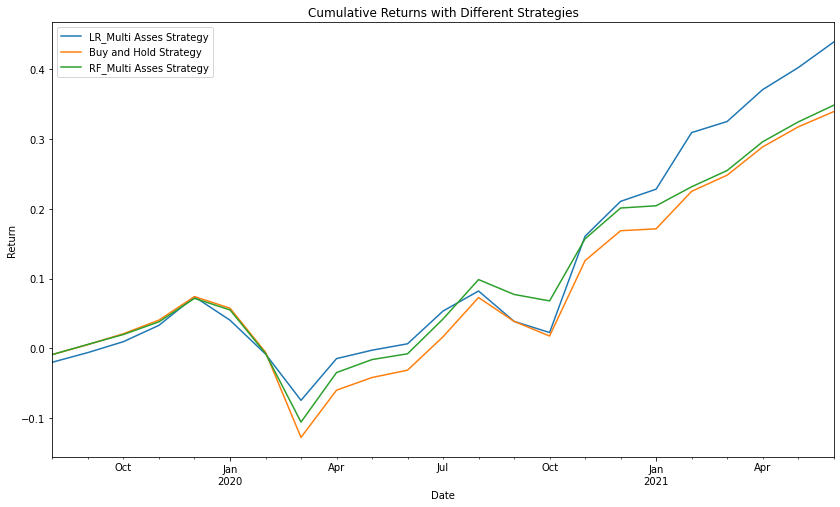

In [80]:
plt.figure(figsize=(14,8))
strategy_allocation=pd.DataFrame(asset_allocation*output_file.iloc[1:,]).sum(axis=1)
strategy_allocation.columns=[['strategy_allocation']]
((1 + strategy_allocation).cumprod() - 1).plot(title='Cumulative Returns with Different Strategies',label='LR_Multi Asses strategy_allocation')

buy_hold_strategy_allocation=pd.DataFrame((1/output_file.shape[1])*output_file.iloc[1:,]).sum(axis=1)
buy_hold_strategy_allocation.columns=[['strategy_allocation']]
((1 + buy_hold_strategy_allocation).cumprod() - 1).plot(title='Cumulative Returns with Different Strategies',label='Buy and Hold strategy_allocation')

strategy_allocation_rf=pd.DataFrame(asset_allocation2*output_file.iloc[1:,]).sum(axis=1)
strategy_allocation_rf.columns=[['strategy_allocation']]
((1 + strategy_allocation_rf).cumprod() - 1).plot(title='Cumulative Returns with Different Strategies',label='RF_Multi Asses strategy_allocation')

plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()


In [87]:
print("Annualized Return:  ", pow((1 + buy_hold_strategy_allocation).cumprod()[-1],12/(buy_hold_strategy_allocation.count()-1))-1)
print("Annualized volatility:  ",buy_hold_strategy_allocation.std()*math.sqrt(12))

Annualized Return:   0.17256501239057753
Annualized volatility:   0.1596645709854472


In [88]:
print("Annualized Return:  ", pow((1 + strategy_allocation).cumprod()[-1],12/(strategy_allocation.count()-1))-1)
print("Annualized volatility:  ",strategy_allocation.std()*math.sqrt(12))

Annualized Return:   0.21934772521314105
Annualized volatility:   0.14829892437932424


In [89]:
print("Annualized Return:  ", pow((1 + strategy_allocation_rf).cumprod()[-1],12/(strategy_allocation_rf.count()-1))-1)
print("Annualized volatility:  ",strategy_allocation_rf.std()*math.sqrt(12))

Annualized Return:   0.17692117010030972
Annualized volatility:   0.13757456173405935
